<a href="https://colab.research.google.com/github/tejareddytadi/Brain-Tumor-Detection-using-CNN/blob/main/custom_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
current_directory = os.getcwd()
for dirname, _, filenames in os.walk('current_directory'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split

import cv2
#from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub

In [ ]:
folder_path_no = "/content/drive/MyDrive/Brain_Tumor_Detection/no"
folder_path_yes = "/content/drive/MyDrive/Brain_Tumor_Detection/yes"

folder_no = os.listdir(folder_path_no)
folder_yes = os.listdir(folder_path_yes)

print(len(folder_no))
print(len(folder_yes))

1500
1500


In [ ]:
## We can consider
   # No Tumor  >> 0
   # Yes Tumor >> 1

no_label = [0]*len(folder_no)
yes_label = [1]*len(folder_yes)

labels = no_label + yes_label
print(len(labels))

3000


In [ ]:
from sklearn.utils import shuffle
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Define paths to your image folders
path_no = "/content/drive/MyDrive/Brain_Tumor_Detection/no/"
path_yes = "/content/drive/MyDrive/Brain_Tumor_Detection/yes/"

# Define image dimensions
img_width, img_height = 224, 224

# Use ImageDataGenerator for efficient loading and augmentation
datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess images using the generators
data_no = np.array([img_to_array(load_img(path_no + img, target_size=(img_width, img_height))) for img in os.listdir(path_no)])
data_yes = np.array([img_to_array(load_img(path_yes + img, target_size=(img_width, img_height))) for img in os.listdir(path_yes)])

# Optionally, you can add labels (0 for 'no' class and 1 for 'yes' class)
labels_no = np.zeros(len(data_no))
labels_yes = np.ones(len(data_yes))

# Concatenate the data and labels
data = np.concatenate([data_no, data_yes])
labels = np.concatenate([labels_no, labels_yes])

# Shuffle the data and labels together
data, labels = shuffle(data, labels, random_state=42)

In [ ]:
data = []

for img in folder_no:
    image = Image.open("/content/drive/MyDrive/Brain_Tumor_Detection/no/"+img)
    image = image.resize((224,224))
    image = image.convert("RGB")
    image = np.array(image)
    data.append(image)

for img in folder_yes:
    image = Image.open("/content/drive/MyDrive/Brain_Tumor_Detection/yes/"+img)
    image = image.resize((224,224))
    image = image.convert("RGB")
    image = np.array(image)
    data.append(image)

In [ ]:
len(data)

3000

In [ ]:
x = np.array(data)
y = np.array(labels)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2400, 224, 224, 3)
(600, 224, 224, 3)
(2400,)
(600,)


In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
model = Sequential()
model.add(Input(shape=(224,224,3)))
model.add(Conv2D(filters=80,kernel_size=(3,3),padding="valid", strides=(1,1) ,activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="valid", strides=(1,1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Conv2D(filters=34,kernel_size=(3,3),padding="valid", strides=(1,1), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='sigmoid'))


model.compile(optimizer="adam", loss="binary_crossentropy",
             metrics=["accuracy"])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 80)      2240      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 80)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      46144     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 500)               9

Epoch 1/30
75/75 [==============================] - 18s 127ms/step - loss: 0.7175 - accuracy: 0.7688 - val_loss: 0.2235 - val_accuracy: 0.8933
Epoch 2/30
75/75 [==============================] - 7s 100ms/step - loss: 0.1673 - accuracy: 0.9438 - val_loss: 0.1164 - val_accuracy: 0.9767
Epoch 3/30
75/75 [==============================] - 8s 102ms/step - loss: 0.0669 - accuracy: 0.9787 - val_loss: 0.1250 - val_accuracy: 0.9667
Epoch 4/30
75/75 [==============================] - 8s 103ms/step - loss: 0.0406 - accuracy: 0.9862 - val_loss: 0.1354 - val_accuracy: 0.9700
Epoch 5/30
75/75 [==============================] - 7s 100ms/step - loss: 0.0442 - accuracy: 0.9887 - val_loss: 0.1547 - val_accuracy: 0.9750
Epoch 6/30
75/75 [==============================] - 8s 101ms/step - loss: 0.0053 - accuracy: 0.9987 - val_loss: 0.1950 - val_accuracy: 0.9817
Epoch 7/30
75/75 [==============================] - 8s 103ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.2504 - val_accuracy: 0.9750
Epoch

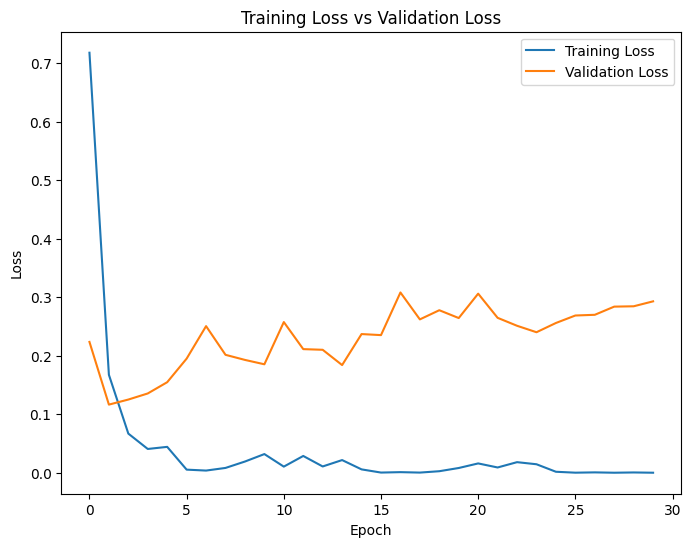

In [ ]:
history = model.fit(x_train_scaled, y_train, epochs=30,
                   validation_data=(x_test_scaled,y_test))  # batch_size=32

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
loss, acc = model.evaluate(x_test_scaled,y_test)
print("Accuracy on Test Data:",acc)

19/19 [==============================] - 1s 30ms/step - loss: 0.2928 - accuracy: 0.9783
Accuracy on Test Data: 0.9783333539962769


epoch 50

Epoch 1/50
75/75 [==============================] - 19s 125ms/step - loss: 0.7558 - accuracy: 0.7563 - val_loss: 0.2711 - val_accuracy: 0.8817
Epoch 2/50
75/75 [==============================] - 8s 103ms/step - loss: 0.2015 - accuracy: 0.9150 - val_loss: 0.2082 - val_accuracy: 0.9383
Epoch 3/50
75/75 [==============================] - 8s 103ms/step - loss: 0.1110 - accuracy: 0.9608 - val_loss: 0.2658 - val_accuracy: 0.9350
Epoch 4/50
75/75 [==============================] - 8s 102ms/step - loss: 0.0587 - accuracy: 0.9812 - val_loss: 0.1917 - val_accuracy: 0.9633
Epoch 5/50
75/75 [==============================] - 8s 105ms/step - loss: 0.0285 - accuracy: 0.9900 - val_loss: 0.1476 - val_accuracy: 0.9783
Epoch 6/50
75/75 [==============================] - 8s 103ms/step - loss: 0.0166 - accuracy: 0.9958 - val_loss: 0.1807 - val_accuracy: 0.9767
Epoch 7/50
75/75 [==============================] - 8s 106ms/step - loss: 0.0111 - accuracy: 0.9958 - val_loss: 0.1979 - val_accuracy: 0.9783
Epoch

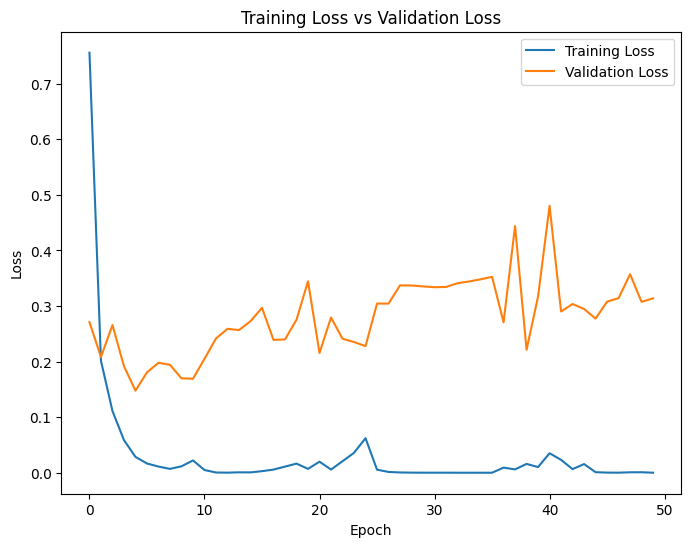

In [ ]:
history = model.fit(x_train_scaled, y_train, epochs=50,
                   validation_data=(x_test_scaled,y_test))  # batch_size=32

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

decreased dense layer neurons an increased dropout to address overfit

In [ ]:
model = Sequential()
model.add(Input(shape=(224,224,3)))
model.add(Conv2D(filters=80,kernel_size=(3,3),padding="valid", strides=(1,1) ,activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="valid", strides=(1,1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Conv2D(filters=34,kernel_size=(3,3),padding="valid", strides=(1,1), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1, activation='sigmoid'))


model.compile(optimizer="adam", loss="binary_crossentropy",
             metrics=["accuracy"])


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 80)      2240      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 80)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      46144     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 128)               2

Epoch 1/50
75/75 [==============================] - 17s 112ms/step - loss: 0.4949 - accuracy: 0.7817 - val_loss: 0.2803 - val_accuracy: 0.8733
Epoch 2/50
75/75 [==============================] - 6s 82ms/step - loss: 0.2147 - accuracy: 0.9175 - val_loss: 0.1363 - val_accuracy: 0.9633
Epoch 3/50
75/75 [==============================] - 6s 86ms/step - loss: 0.0911 - accuracy: 0.9708 - val_loss: 0.1127 - val_accuracy: 0.9783
Epoch 4/50
75/75 [==============================] - 6s 83ms/step - loss: 0.0525 - accuracy: 0.9829 - val_loss: 0.1049 - val_accuracy: 0.9767
Epoch 5/50
75/75 [==============================] - 6s 87ms/step - loss: 0.0333 - accuracy: 0.9887 - val_loss: 0.1337 - val_accuracy: 0.9667
Epoch 6/50
75/75 [==============================] - 6s 84ms/step - loss: 0.0322 - accuracy: 0.9904 - val_loss: 0.1020 - val_accuracy: 0.9767
Epoch 7/50
75/75 [==============================] - 7s 87ms/step - loss: 0.0313 - accuracy: 0.9908 - val_loss: 0.1104 - val_accuracy: 0.9767
Epoch 8/50


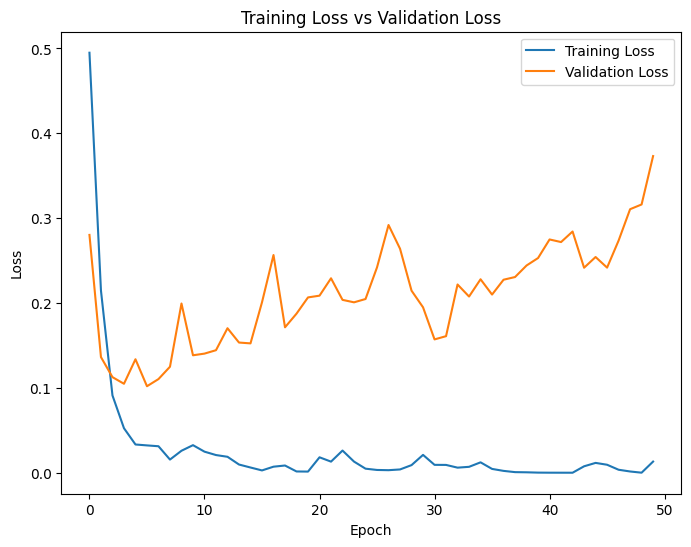

In [ ]:
history = model.fit(x_train_scaled, y_train, epochs=50,
                   validation_data=(x_test_scaled,y_test))  # batch_size=32

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

increased drop out and also decresed neurons in dense layers with early stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()
model.add(Input(shape=(224,224,3)))
model.add(Conv2D(filters=80,kernel_size=(3,3),padding="valid", strides=(1,1) ,activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="valid", strides=(1,1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Conv2D(filters=34,kernel_size=(3,3),padding="valid", strides=(1,1), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1, activation='sigmoid'))

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)
model.compile(optimizer="adam", loss="binary_crossentropy",
             metrics=["accuracy"])


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 80)      2240      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 80)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      46144     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 128)               2

Epoch 1/50
75/75 [==============================] - 17s 111ms/step - loss: 0.5064 - accuracy: 0.7667 - val_loss: 0.2609 - val_accuracy: 0.9250
Epoch 2/50
75/75 [==============================] - 6s 82ms/step - loss: 0.2452 - accuracy: 0.9058 - val_loss: 0.1577 - val_accuracy: 0.9467
Epoch 3/50
75/75 [==============================] - 7s 87ms/step - loss: 0.1316 - accuracy: 0.9588 - val_loss: 0.1199 - val_accuracy: 0.9650
Epoch 4/50
75/75 [==============================] - 6s 86ms/step - loss: 0.0674 - accuracy: 0.9796 - val_loss: 0.0945 - val_accuracy: 0.9750
Epoch 5/50
75/75 [==============================] - 6s 86ms/step - loss: 0.0391 - accuracy: 0.9917 - val_loss: 0.0865 - val_accuracy: 0.9817
Epoch 6/50
75/75 [==============================] - 6s 83ms/step - loss: 0.0342 - accuracy: 0.9896 - val_loss: 0.1479 - val_accuracy: 0.9700
Epoch 7/50
75/75 [==============================] - 7s 88ms/step - loss: 0.0330 - accuracy: 0.9892 - val_loss: 0.0971 - val_accuracy: 0.9783
Epoch 8/50


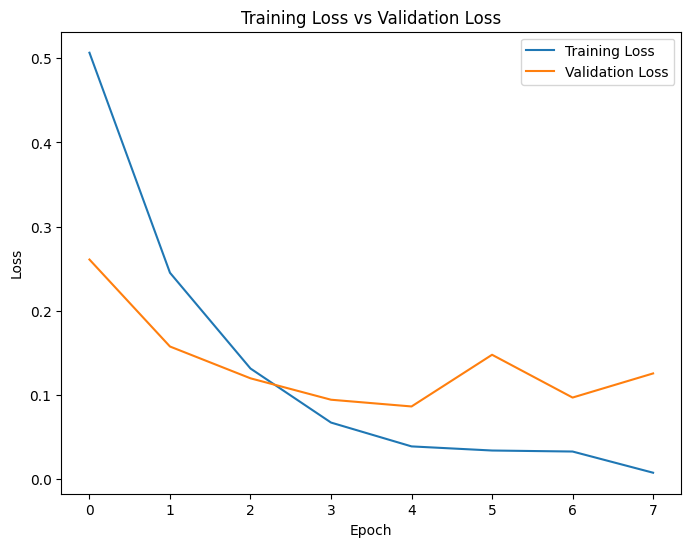

In [ ]:

history = model.fit(x_train_scaled, y_train, epochs=50,
                   validation_data=(x_test_scaled,y_test),
                    callbacks=[early_stopping])  # batch_size=32
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

tanh and xavier

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf  # Assuming you're using TensorFlow

model = tf.keras.Sequential()

# Input layer
model.add(tf.keras.Input(shape=(224, 224, 3)))

# Convolutional layers with Xavier initialization
model.add(tf.keras.layers.Conv2D(filters=80, kernel_size=(3, 3), padding="valid", strides=(1, 1), activation="relu", kernel_initializer=tf.keras.initializers.GlorotUniform()))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="valid", strides=(1, 1), activation="relu", kernel_initializer=tf.keras.initializers.GlorotUniform()))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# model.add(tf.keras.layers.Conv2D(filters=34, kernel_size=(3, 3), padding="valid", strides=(1, 1), activation="relu", kernel_initializer=tf.keras.initializers.GlorotUniform()))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(tf.keras.layers.Flatten())

# Dense layers with Xavier initialization
model.add(tf.keras.layers.Dense(units=256, activation='tanh', kernel_initializer=tf.keras.initializers.RandomNormal()))
model.add(tf.keras.layers.Dense(units=128, activation='tanh', kernel_initializer=tf.keras.initializers.RandomNormal()))
model.add(tf.keras.layers.Dropout(0.4))


# Output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)
model.compile(optimizer="adam", loss="binary_crossentropy",
             metrics=["accuracy"])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 80)      2240      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 80)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      46144     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

Epoch 1/50
75/75 [==============================] - 18s 124ms/step - loss: 0.6247 - accuracy: 0.6775 - val_loss: 0.4775 - val_accuracy: 0.7833
Epoch 2/50
75/75 [==============================] - 7s 94ms/step - loss: 0.4064 - accuracy: 0.8183 - val_loss: 0.2576 - val_accuracy: 0.8883
Epoch 3/50
75/75 [==============================] - 7s 94ms/step - loss: 0.1654 - accuracy: 0.9396 - val_loss: 0.1052 - val_accuracy: 0.9683
Epoch 4/50
75/75 [==============================] - 7s 94ms/step - loss: 0.0550 - accuracy: 0.9850 - val_loss: 0.0760 - val_accuracy: 0.9800
Epoch 5/50
75/75 [==============================] - 7s 89ms/step - loss: 0.0268 - accuracy: 0.9950 - val_loss: 0.0888 - val_accuracy: 0.9800
Epoch 6/50
75/75 [==============================] - 7s 94ms/step - loss: 0.0094 - accuracy: 0.9992 - val_loss: 0.0748 - val_accuracy: 0.9867
Epoch 7/50
75/75 [==============================] - 7s 95ms/step - loss: 0.0065 - accuracy: 0.9992 - val_loss: 0.0719 - val_accuracy: 0.9867
Epoch 8/50


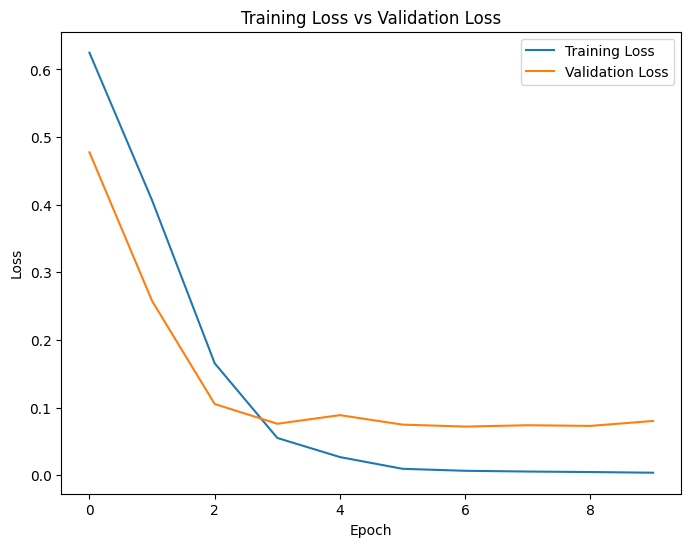

19/19 [==============================] - 1s 27ms/step - loss: 0.0719 - accuracy: 0.9867
Accuracy on Test Data: 0.9866666793823242


In [ ]:
history = model.fit(x_train_scaled, y_train, epochs=50,
                   validation_data=(x_test_scaled,y_test),
                    callbacks=[early_stopping])  # batch_size=32
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

loss, acc = model.evaluate(x_test_scaled,y_test)
print("Accuracy on Test Data:",acc)